# Nathan Oyama

February 26, 2025

**Important:** Some answers may have slightly different values because of the following data arrangements: 

* As in **Ans 1.2** and **Ans 1.3**, the answers are based on a trimmed data frame which has excluded the invalid records: the entry in the `car` field is `'do not drive'` or `'Car that is too old to install Onstar :D'`.
* From **Ans 2.2** through **Ans 2.7**, all records are based on the data frame `DataFrame` in **Ans 2.1**. All records in this data frame are about the people who received the bar coupons.
* In **Ans 2.4** and **Ans 2.5**, the acceptance rate of the first group is based on drivers who go to a bar more than three times a month instead of month because the `Bar` column has entries of `less1` and `1~3` around 1.
* In **Ans 2.6**, the acceptance rate of the first group is based on drivers who go to cheap restaurants more than 3 times a month instead of 4 times because the `RestaurantLessThan50` column has entries of `1~3` and `4~8` around 4.

---

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.

**Ans 1.1.** Read the CSV file in Pandas and make it a data frame called `data`:

In [54]:
data = pd.read_csv('./coupons.csv')

Ensure that the CSV file has been loaded in the `data` data field:

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


---

2. Investigate the dataset for missing or problematic data.

**Ans 1.2.** See the structure of the data frame `data`:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In this entire assignment, you need the following columns in addition to the index of this data frame: `passanger` [sic], `coupon`, `age`, `maritalStatus`, `occupation`, `income`, `car`, `Bar`, `RestaurantLessThan20`, and `Y`.

Trim the data frame to see only those columns: 

In [5]:
columns = [
    'passanger',
    'temperature',
    'coupon',
    'age',
    'maritalStatus',
    'occupation',
    'income',
    'car',
    'Bar',
    'RestaurantLessThan20',
    'Y'
    ]

data_trim = data[columns]

data_trim.head()

,passanger,temperature,coupon,age,maritalStatus,occupation,income,car,Bar,RestaurantLessThan20,Y
0,Alone,55,Restaurant(<20),21,Unmarried partner,Unemployed,$37500 - $49999,NaN,never,4~8,1
1,Friend(s),80,Coffee House,21,Unmarried partner,Unemployed,$37500 - $49999,NaN,never,4~8,0
2,Friend(s),80,Carry out & Take away,21,Unmarried partner,Unemployed,$37500 - $49999,NaN,never,4~8,1
3,Friend(s),80,Coffee House,21,Unmarried partner,Unemployed,$37500 - $49999,NaN,never,4~8,0
4,Friend(s),80,Coffee House,21,Unmarried partner,Unemployed,$37500 - $49999,NaN,never,4~8,0


Count the null records: 

In [6]:
data_trim.isnull().sum()

passanger                   0
temperature                 0
coupon                      0
age                         0
maritalStatus               0
occupation                  0
income                      0
car                     12576
Bar                       107
RestaurantLessThan20      130
Y                           0
dtype: int64

Keep in mind, there are several columns containing null entries: `car`, `Bar`, and `RestaurantLessThan20`.

Next, see all entries for every column: 

In [7]:
data_trim['passanger'].value_counts()

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

In [8]:
data_trim['temperature'].value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

In [9]:
data_trim['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [10]:
data_trim['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

The `age` column has these string entries, and they are not numbers.

In [11]:
data_trim['maritalStatus'].value_counts()

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64

In [12]:
data_trim['occupation'].value_counts()

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

In [13]:
data['income'].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [14]:
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

The `car` column needs special care. There are as many as 12,576 null records, and some entries are irrelevant in this study: `do not drive` and `Car that is too old to install Onstar :D`.

Nonetheless, you can keep the null records for those who skipped this field because they are the vast majority of the entire records:

In [15]:
data['car'].isnull().sum() / data.shape[0]

np.float64(0.9914853358561968)

Include those 99.1% records with null values in the `car` field.

In [16]:
data_trim['Bar'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

As seen earlier, there are 107 null entries in the `Bar` column.

In [17]:
data_trim['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

As seen earlier, there are 130 null entries in the `RestaurantLessThan20` column.

In [18]:
data_trim['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

In addition to the issue in the `car` column, there could be more issues in the other columns we do not use in this assignment.

3. Decide what to do about your missing data -- drop, replace, other...

**Ans 1.3.** Remove records whose `car` field has `do not drive` or `Car that is too old to install Onstar :D` because those people should not have participated in this survey.

First, select those records to remove: 

In [19]:
car_bad = [
    'do not drive',
    'Car that is too old to install Onstar :D'
    ]

data_trim_carvalid = data_trim.query('car not in @car_bad')

Ensure that this data frame only include records with good values in the `car` fields: 

In [20]:
data_trim_carvalid['car'].value_counts()

car
Scooter and motorcycle    22
Mazda5                    22
crossover                 21
Name: count, dtype: int64

In [21]:
data_trim_carvalid.shape[0]

12641

The total number of the records in the original data frame `data` is

In [22]:
data.shape[0]

12684

This total number is 43 greater than that of `data_trim_carvalid` after subtracting 43 bad records.  From now on, use the second data frame.

---

4. What proportion of the total observations chose to accept the coupon?



**Ans 1.4.** See the `Y` column and its definition in the problem statement, and split those people into two groups: 

* **The `Y` field is 1:** People who have answered _"right away"_ or _"later before the coupon expires"_
* **The `Y` field is 0:** The other people who have answered _"no, I do not want the coupon"_

As mentioned earlier, there is no null entry in the `Y` column. Hence all records have either 1 or 0 in the `Y` field. Hence you can get the acceptance rate from the number of the records in the first group divided by that of records in the entire data frame:

In [23]:
data_trim_carvalid.query('Y == 1').shape[0] \
    / data_trim_carvalid.shape[0]

0.5682303615220314

The acceptance rate of the all people is approximately **56.8%**.

---

5. Use a bar plot to visualize the `coupon` column.

**Ans 1.5.** Count the `coupon` entries in the trimmed data frame:

In [24]:
coupon_count = data_trim_carvalid[['coupon']]\
    .value_counts().to_frame().reset_index()

coupon_count 

,coupon,count
0,Coffee House,3983
1,Restaurant(<20),2776
2,Carry out & Take away,2385
3,Bar,2013
4,Restaurant(20-50),1484


Draw a bar graph for the count of every coupon type by using Seaborn:

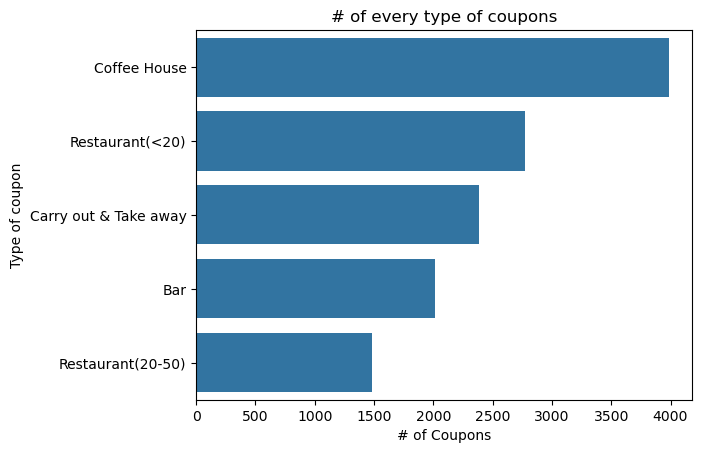

In [25]:
sns.barplot(data=coupon_count, x='count', y='coupon')

plt.title('# of every type of coupons')
plt.xlabel('# of Coupons')
plt.ylabel('Type of coupon')

plt.show()

---

6. Use a histogram to visualize the temperature column.

**Ans 1.6.** Draw a histogram of the temperature. The $x$ axis is for the temperature in Fahrenheit and the $y$ axis is for the number of records. At this time use the plotting feature of Pandas:

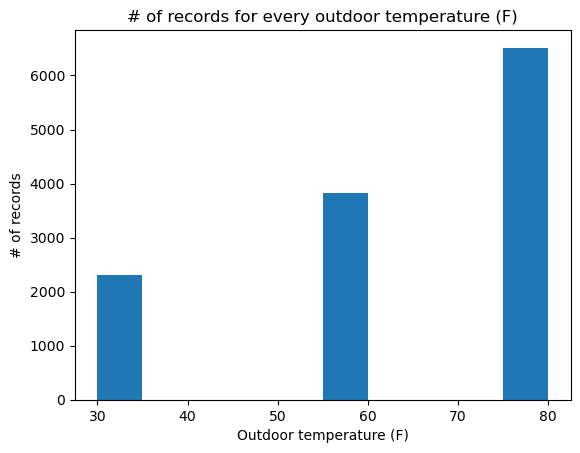

In [26]:
# data_trim_carvalid[['temperature']].hist()
data_trim_carvalid[['temperature']].plot(\
    kind='hist',
    title="# of records for every outdoor temperature (F)",
    xlabel="Outdoor temperature (F)",
    ylabel="# of records",
    legend=False
    )

plt.show()

---

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


**Ans 2.1.** Create the data frame `DataFrame` from the data frame `data_trim_carvalid` where the `coupon` field is `Bar`:

In [27]:
DataFrame = data_trim_carvalid.query('coupon == "Bar"')

Ensure that the data frame was made: 

In [28]:
DataFrame.head()

,passanger,temperature,coupon,age,maritalStatus,occupation,income,car,Bar,RestaurantLessThan20,Y
9,Kid(s),80,Bar,21,Unmarried partner,Unemployed,$37500 - $49999,NaN,never,4~8,0
13,Alone,55,Bar,21,Unmarried partner,Unemployed,$37500 - $49999,NaN,never,4~8,1
17,Alone,55,Bar,21,Unmarried partner,Unemployed,$37500 - $49999,NaN,never,4~8,0
24,Friend(s),80,Bar,21,Single,Architecture & Engineering,$62500 - $74999,NaN,never,4~8,1
35,Alone,55,Bar,21,Single,Architecture & Engineering,$62500 - $74999,NaN,never,4~8,1


---

2. What proportion of bar coupons were accepted?


**Ans 2.2.** The data frame `DataFrame` only contains all the people who received the bar coupons. And there is no null entry in the `Y` column as seen earlier. Therefore, you can get the acceptance rate by counting the number of all records whose `Y` field is 1 divided by the total number of recordfs of this data frame:

In [29]:
DataFrame.query('Y == 1').shape[0] / DataFrame.shape[0]

0.4098360655737705

It is approximately 41.0%.

---

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


**Ans 2.3.** Trim the dataframe `DataFrame` for the records of people who went to any bar three or fewer times, that is, those who have answered _"Never"_, _"Less than 1 time"_, or _"Between 1 time and 3 times"_:

In [30]:
bar_few = DataFrame.query('Bar in ["never", "less1", "1~3"]')

bar_few.head()

,passanger,temperature,coupon,age,maritalStatus,occupation,income,car,Bar,RestaurantLessThan20,Y
9,Kid(s),80,Bar,21,Unmarried partner,Unemployed,$37500 - $49999,NaN,never,4~8,0
13,Alone,55,Bar,21,Unmarried partner,Unemployed,$37500 - $49999,NaN,never,4~8,1
17,Alone,55,Bar,21,Unmarried partner,Unemployed,$37500 - $49999,NaN,never,4~8,0
24,Friend(s),80,Bar,21,Single,Architecture & Engineering,$62500 - $74999,NaN,never,4~8,1
35,Alone,55,Bar,21,Single,Architecture & Engineering,$62500 - $74999,NaN,never,4~8,1


Similarly, trim the dataframe `DataFrame` for those who went to any bar 4 times or more, that is, those who have answered _"Between 4 times and 8 times"_ or _"More than 8 times"_: 

In [31]:
bar_many = DataFrame.query('Bar in ["4~8", "gt8"]')

bar_many.head()

,passanger,temperature,coupon,age,maritalStatus,occupation,income,car,Bar,RestaurantLessThan20,Y
156,Friend(s),80,Bar,26,Single,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,1
167,Alone,55,Bar,26,Single,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,1
171,Alone,55,Bar,26,Single,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,1
454,Friend(s),80,Bar,31,Single,Management,$50000 - $62499,NaN,gt8,gt8,0
465,Alone,55,Bar,31,Single,Management,$50000 - $62499,NaN,gt8,gt8,1


Like the previous problem, count the records who have accepted the bar coupon ($Y = 1$) and divide it by the total number for each group. First, calculate the acceptance rate of the first group for people who go to a bar 3 times or less:

In [32]:
bar_few[['Y']].value_counts()[1] / bar_few.shape[0]

np.float64(0.3710306406685237)

Repeat it for the other group of people who went to bars 4 times or more:

In [33]:
bar_many[['Y']].value_counts()[1] / bar_many.shape[0]

np.float64(0.766497461928934)

Hence the coupon acceptance rate of those who went to the bar 3 times or less is significantly lower than the one of the other group of people who went to bars 4 times or more: 37.1% vs. 76.6%.

---

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

**Ans 2.4.** Compare the two groups in the people who received the bar coupons: 

* *Group 4a*: {Go to a bar more than ~once~ <ins>three times</ins> a month} _and also_ {over the age of 25}
* *Group 4b*: all others

*Group 4a* is part of the dataframe `data_bar_many` for those who went to the bar 4 times or more in the previous problem. Select those records for the age of over 25:

In [34]:
group_4a = DataFrame.query('1 == 1 \
    & Bar in ["4~8", "gt8"] \
    & age in ["26", "31", "36", "41", "46", "50plus"] \
    ')

group_4a.head()

,passanger,temperature,coupon,age,maritalStatus,occupation,income,car,Bar,RestaurantLessThan20,Y
156,Friend(s),80,Bar,26,Single,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,1
167,Alone,55,Bar,26,Single,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,1
171,Alone,55,Bar,26,Single,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,1
454,Friend(s),80,Bar,31,Single,Management,$50000 - $62499,NaN,gt8,gt8,0
465,Alone,55,Bar,31,Single,Management,$50000 - $62499,NaN,gt8,gt8,1


Calculate the acceptance rate of *Group 4a*: 

In [35]:
group_4a.query('Y == 1').shape[0] / group_4a.shape[0]

0.7686567164179104

*Group 4b* is the people who received the bar coupons excluding ones in *Group 4a*:

In [36]:
group_4b = DataFrame.query('index not in @group_4a.index')

Calculate the acceptance rate of *Group 4b*:

In [37]:
group_4b.query('Y == 1').shape[0] / group_4b.shape[0]

0.3842469398616285

Hence, among the people who received the bar coupons, *Group 4a* for people who went to any bar 4 times or more and also being over the age of 25 has a higher acceptance rate comparing to *Group 4b* for others: 76.9% vs. 38.4%.

---

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


**Ans 2.5.** There are two groups in the people who received the bar coupons: 

* Group 5a: {Go to the bar more than ~~once~~ <ins>3 times</ins> a month} <br> _and also_ {Has passengers excluding Kid(s)}<br> _and also_ {Has an occupation excluding "Farming", "Fishing", or "Forestry"}
* Group 5b: all others

Get a data frame for *Group 5a*: 

In [38]:
group_5a = DataFrame.query('1 == 1 \
    & Bar in ["4~8", "gt8"] \
    & passanger != "Kid(s)" \
    & occupation != "Farming Fishing & Forestry" \
    ')

group_5a.head()

,passanger,temperature,coupon,age,maritalStatus,occupation,income,car,Bar,RestaurantLessThan20,Y
156,Friend(s),80,Bar,26,Single,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,1
167,Alone,55,Bar,26,Single,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,1
171,Alone,55,Bar,26,Single,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,1
454,Friend(s),80,Bar,31,Single,Management,$50000 - $62499,NaN,gt8,gt8,0
465,Alone,55,Bar,31,Single,Management,$50000 - $62499,NaN,gt8,gt8,1


Calculate the acceptance rate of *Group 5a*:

In [39]:
group_5a.query('Y == 1').shape[0] / group_5a.shape[0]

0.7724867724867724

*Group 5b* is the people who received the bar coupons excluding ones in *Group 5a*:

In [40]:
group_5b = DataFrame.query('index not in @group_5a.index')

Calculate the acceptance rate of *Group 5b*:

In [41]:
group_5b.query('Y == 1').shape[0] / group_5b.shape[0]

0.37225877192982454

Hence, among the people who received the bar coupons, *Group 5a* has a higher acceptance rate comparing to *Group 5b* for others: 77.2% vs. 37.2%.

---

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



**Ans 2.6** Let *Group 6a*, *Group 6b*, and *Group 6c* be these three groups.

First, get a data frame for *Group 6a* for 

> go to bars more than once a month and are under the age of 30

or

* going to bars more than once a month
* having passengers that were not a kid
* not widowed

In [42]:
group_6a = DataFrame.query('1 == 1 \
    & Bar in ["4~8", "gt8"] \
    & passanger != "Kid(s)" \
    & maritalStatus != "Widowed" \
    ')

group_6a.head()

,passanger,temperature,coupon,age,maritalStatus,occupation,income,car,Bar,RestaurantLessThan20,Y
156,Friend(s),80,Bar,26,Single,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,1
167,Alone,55,Bar,26,Single,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,1
171,Alone,55,Bar,26,Single,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,1
454,Friend(s),80,Bar,31,Single,Management,$50000 - $62499,NaN,gt8,gt8,0
465,Alone,55,Bar,31,Single,Management,$50000 - $62499,NaN,gt8,gt8,1


Calculate the acceptance rate of *Group 6a*:

In [43]:
group_6a.query('Y == 1').shape[0] / group_6a.shape[0]

0.7724867724867724

Second, get a data frame for *Group 6b* for 

> go to bars more than once a month and are under the age of 30

or

* go to bars more than once a month
* under the age of 30

In [44]:
group_6b = DataFrame.query('1 == 1 \
    & Bar in ["4~8", "gt8"] \
    & age in ["below21", "21", "26"] \
    ')

group_6b.head()

,passanger,temperature,coupon,age,maritalStatus,occupation,income,car,Bar,RestaurantLessThan20,Y
156,Friend(s),80,Bar,26,Single,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,1
167,Alone,55,Bar,26,Single,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,1
171,Alone,55,Bar,26,Single,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,1
591,Friend(s),80,Bar,26,Single,Office & Administrative Support,$50000 - $62499,NaN,4~8,1~3,1
602,Alone,55,Bar,26,Single,Office & Administrative Support,$50000 - $62499,NaN,4~8,1~3,1


Calculate the acceptance rate of *Group 6a*:

In [45]:
group_6b.query('Y == 1').shape[0] / group_6b.shape[0]

0.8059701492537313

Third, get a data frame for *Group 6c* for 

> go to cheap restaurants more than 4 times a month and income is less than 50K

or 

* going to restaurant ~~more than~~ 4 times <ins>or more</ins> a month and every time spending less than $20
* income is less than 50K

In [46]:
group_6c = DataFrame.query('1 == 1 \
    & RestaurantLessThan20 in ["4~8", "gt8"] \
    & income in [\
        "Less than $12500", "$12500", "$12500 - $24999", \
        "$25000 - $37499", "$37500 - $49999" \
        ] \
    ')

group_6c.head()

,passanger,temperature,coupon,age,maritalStatus,occupation,income,car,Bar,RestaurantLessThan20,Y
9,Kid(s),80,Bar,21,Unmarried partner,Unemployed,$37500 - $49999,NaN,never,4~8,0
13,Alone,55,Bar,21,Unmarried partner,Unemployed,$37500 - $49999,NaN,never,4~8,1
17,Alone,55,Bar,21,Unmarried partner,Unemployed,$37500 - $49999,NaN,never,4~8,0
156,Friend(s),80,Bar,26,Single,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,1
167,Alone,55,Bar,26,Single,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,1


As shown in the query for `RestaurantLessThan20` in the command, none of the selected records contains a null entry in this field. Calculate the acceptance rate of *Group 6c*: 

In [47]:
group_6c.query('Y == 1').shape[0] / group_6c.shape[0]

0.45348837209302323

To sum up, the acceptance rates for those three groups are

* *Group 6a*: 77.2%
* *Group 6b*: 80.6%
* *Group 6c*: 45.3%

Comparing to the acceptance rate of the entire data frame you got in **Ans 2.2**, which was 41.0%, *Group 6a* and *Group 6b* have significantly higher acceptance rates whereas *Group 6c* has a slightly higher acceptance rate.

---

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Ans 2.7.** So far you have compared groups of people who received bar coupons with several factors.

A single factor:

* Frequent bar visitors has a higher acceptance rate comparing to rare visitors. (**Ans 2.3**)


Multiple factors:

* Old frequent bar visitors have a higher acceptance rate. (**Ans 2.4**)
* Frequent bar visitors without kids on the passenger seat and also having jobs of neither farming, fishing, nor forestry have a higher acceptance rate. (**Ans 2.5**)
* Frequent bar visitors without a kid on the passenger seat and also not being widowed have a higer acceptance rate. (*Group 6a* in **Ans 2.6**)
* Young frequent bar visitors have a higher acceptance rate. (*Group 6b* in **Ans 2.6**)
* Low-income, frequent cheap restaurant visitors have the acceptance rate that is similar to the average. (*Group 6c* in **Ans 2.6**)

You cannot tell which factor has affected the acceptance rate by seeing those multi-factor cases. It is like someone says _"white women are small"_ but you cannot tell whether white people are small in general or women are small in general, until you compare those white women with the entire white population and with the entire women population. In **Ans 3**, you revisit **Ans 2.4** and check how every factor&mdash;the age and the frequency to visit bars&mdash;affect the acceptance rate.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Ans 3.** Verify **Ans 2.4** and see if there is any correlation between the age and the acceptance rate. Consider the four groups: 

* *Group 3a ("old frequent visitor")*: Goes to bars 4 times or more. Over the age of 25.
* *Group 3b ("young frequent visitor")*: Goes to bars 4 times or more. At the age of 25 or younger.
* *Group 3c ("old rare visitor")*: Goes to bars 3 times or less. Over the age of 25.
* *Group 3d ("young rare visitor")*: Goes to bars 3 times or less. At the age of 25 or younger.

*Group 3a* is the same as Group 4a whose acceptance rate is 76.9%. A set of *Group 3b*, *Group 3c*, and *Group 3d* are the same as *Group 4b*.

Calculate the acceptance rate of *Group 3b ("young frequent visitor")*:

In [48]:
group_3b = DataFrame.query('1 == 1 \
    & Bar in ["4~8", "gt8"] \
    & age in ["below21", "21"] \
    ')

In [49]:
group_3b.query('Y == 1').shape[0] / group_3b.shape[0]

0.7619047619047619

Calculate the acceptance rate of *Group 3c ("old rare visitor")*:

In [50]:
group_3c = DataFrame.query('1 == 1 \
    & Bar not in ["4~8", "gt8"] \
    & age not in ["below21", "21"] \
    ')

In [51]:
group_3c.query('Y == 1').shape[0] / group_3c.shape[0]

0.3449527959331881

Calculate the acceptance rate of Group 3d ("young rare visitor"):

In [52]:
group_3d = DataFrame.query('1 == 1 \
    & Bar not in ["4~8", "gt8"] \
    & age     in ["below21", "21"] \
    ')

In [53]:
group_3d.query('Y == 1').shape[0] / group_3d.shape[0]

0.4533029612756264

To summarize those acceptance rates, frequent visitors have a little correlation between the age and the acceptance rates whereas rare visitors have a more correlation: young rare visitors tend to accept the bar coupons comparing to old rare visitors.

| Acceptance Rate   | Old    | Young |
|-------------------|--------|-------|
| Frequent visitors | 76.9 % | 76.2% |
| Rare visitors     | 34.5 % | 45.3% |

You can revisit **Ans 2.5** and **Ans 2.6** with multiple factors and check which factor affects the acceptance rate in a similar fashion. &#9632;